<a href="https://colab.research.google.com/github/lalit527/Machine-Learning/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [0]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

In [0]:
from keras.datasets import mnist

In [69]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"The MNIST database has a training set of {len(X_train)} examples")
print(f"The MNIST database has a test set of {len(X_test)} examples")

The MNIST database has a training set of 60000 examples
The MNIST database has a test set of 10000 examples


## 2. Visualize the First Training Images

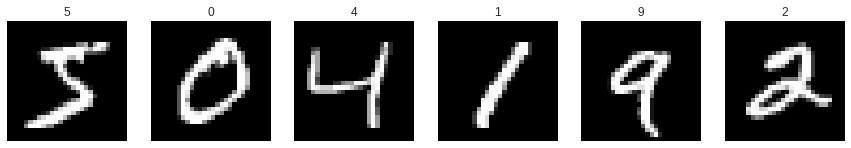

In [70]:
fig = plt.figure(figsize=(15, 15))
for i in range(6):
  ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
  ax.imshow(X_train[i], cmap='gray')
  ax.set_title(str(y_train[i]))

### 3. View an Inage in More Detail

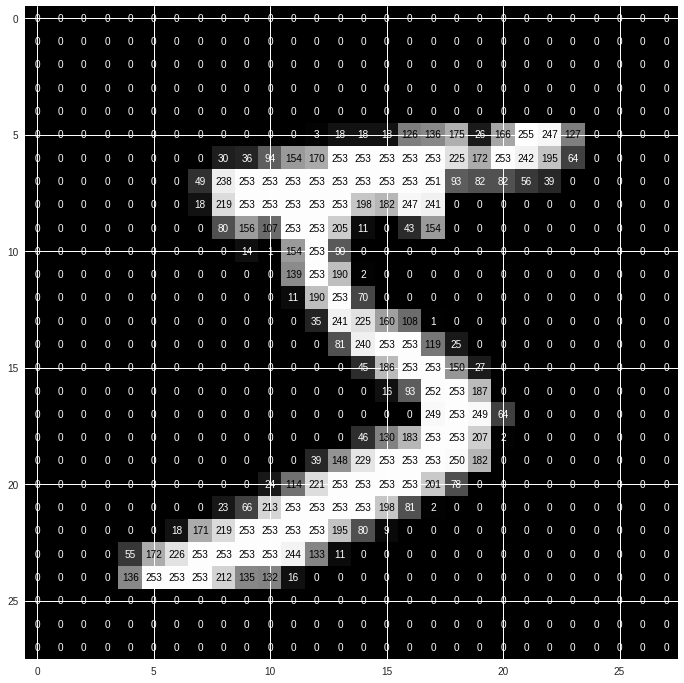

In [71]:
def visualize_input(img, ax):
  ax.imshow(img, cmap='gray')
  width, height = img.shape
  thres = img.max() / 2.5
  for w in range(width):
    for h in range(height):
      ax.annotate(str(round(img[w][h], 2)), xy=(h, w),
                  horizontalalignment='center',
                  verticalalignment='center',
                  color='white' if img[w][h] < thres else 'black')

fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)
      

### 4. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [0]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

### 5. Encode Categorical Integer Labels Using One Hot Encoding

In [73]:
print('Integer Valued Labels')
print(y_train[:10])

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print('One Hot Labels')
print(y_train[:10])

Integer Valued Labels
[5 0 4 1 9 2 1 3 1 4]
One Hot Labels
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


### 6. Define the Model

In [74]:
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### 7.Compile the Model

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### 8. Caculate the Classification Accuracy on the Test Set(Befor Training)

In [76]:
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100 * score[1]

print(f'Test accuracy: {accuracy:.4f}')

Test accuracy: 8.7600


### 9. Train the Model

In [77]:
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5',
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
                 validation_split=0.2, callbacks=[checkpointer],
                 verbose=1, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 61us/step - loss: 0.2718 - acc: 0.9155 - val_loss: 0.1480 - val_acc: 0.9541

Epoch 00001: val_loss improved from inf to 0.14803, saving model to mnist.model.best.hdf5
Epoch 2/10
48000/48000 [==============================] - 3s 54us/step - loss: 0.1109 - acc: 0.9660 - val_loss: 0.0951 - val_acc: 0.9717

Epoch 00002: val_loss improved from 0.14803 to 0.09512, saving model to mnist.model.best.hdf5
Epoch 3/10
48000/48000 [==============================] - 3s 54us/step - loss: 0.0786 - acc: 0.9766 - val_loss: 0.0878 - val_acc: 0.9750

Epoch 00003: val_loss improved from 0.09512 to 0.08776, saving model to mnist.model.best.hdf5
Epoch 4/10
48000/48000 [==============================] - 3s 53us/step - loss: 0.0597 - acc: 0.9813 - val_loss: 0.0934 - val_acc: 0.9746

Epoch 00004: val_loss did not improve from 0.08776
Epoch 5/10
48000/48000 [==============================] - 3s 54us/ste

### 10. Load the Model with the Best Classification Accuracy on the Validation Set

In [0]:
model.load_weights('mnist.model.best.hdf5')

### 11. Calculate the Classification Accuracy on the Test Set

In [79]:
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100 * score[1]

print(f'Test Accuracy {accuracy:.4f}')

Test Accuracy 97.6500


In [80]:
score

[0.07900653060968034, 0.9765]

### 12. Testing with CNN Model

In [0]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [82]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same',
                     activation='relu', input_shape=X_train.shape[1:]))
cnn_model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same',
                     activation='relu'))
cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same',
                     activation='relu'))
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same',
                     activation='relu'))
cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())
cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(10, activation='softmax'))

cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [0]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
cnn_model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=['accuracy'])

In [84]:
checkpointer = ModelCheckpoint(filepath='mnist.model.best.cnn.hdf5',
                               verbose=1, save_best_only=True)
hist = cnn_model.fit(X_train, y_train, batch_size=128, epochs=10,
                 validation_split=0.2, callbacks=[checkpointer],
                 verbose=1, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 10s 210us/step - loss: 0.2303 - acc: 0.9273 - val_loss: 0.0615 - val_acc: 0.9835

Epoch 00001: val_loss improved from inf to 0.06152, saving model to mnist.model.best.cnn.hdf5
Epoch 2/10
48000/48000 [==============================] - 9s 192us/step - loss: 0.0578 - acc: 0.9830 - val_loss: 0.0350 - val_acc: 0.9914

Epoch 00002: val_loss improved from 0.06152 to 0.03495, saving model to mnist.model.best.cnn.hdf5
Epoch 3/10
48000/48000 [==============================] - 9s 192us/step - loss: 0.0429 - acc: 0.9879 - val_loss: 0.0514 - val_acc: 0.9859

Epoch 00003: val_loss did not improve from 0.03495
Epoch 4/10
48000/48000 [==============================] - 9s 192us/step - loss: 0.0376 - acc: 0.9891 - val_loss: 0.0393 - val_acc: 0.9892

Epoch 00004: val_loss did not improve from 0.03495
Epoch 5/10
48000/48000 [==============================] - 9s 192us/step - loss: 0.0316 - acc: 0.990

In [0]:
cnn_model.load_weights('mnist.model.best.cnn.hdf5')

In [87]:
score = cnn_model.evaluate(X_test, y_test, verbose=0)
accuracy = 100 * score[1]

print(f'Test Accuracy {accuracy:.4f}')

Test Accuracy 99.2300


### 13. Let's use Image Augmentation

Split training data into training and validation data

In [96]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1)
print(f'Shape of the training data {X_train.shape}')
print(f'Shape of the validation dat {X_val.shape}')

Shape of the training data (54000, 28, 28, 1)
Shape of the validation dat (6000, 28, 28, 1)


In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False  # randomly flip images

)

datagen.fit(X_train)

In [98]:
batch_size=128

checkpointer = ModelCheckpoint(filepath='mnist.model.best.cnn.aug.hdf5',
                               verbose=1, save_best_only=True)

hist = cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                        epochs=10, validation_data=(X_val, y_val), callbacks=[checkpointer],
                        verbose=2, shuffle=True, steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
 - 18s - loss: 0.0994 - acc: 0.9718 - val_loss: 0.0251 - val_acc: 0.9923

Epoch 00001: val_loss improved from inf to 0.02514, saving model to mnist.model.best.cnn.aug.hdf5
Epoch 2/10
 - 18s - loss: 0.0700 - acc: 0.9800 - val_loss: 0.0248 - val_acc: 0.9935

Epoch 00002: val_loss improved from 0.02514 to 0.02478, saving model to mnist.model.best.cnn.aug.hdf5
Epoch 3/10
 - 17s - loss: 0.0598 - acc: 0.9831 - val_loss: 0.0206 - val_acc: 0.9935

Epoch 00003: val_loss improved from 0.02478 to 0.02061, saving model to mnist.model.best.cnn.aug.hdf5
Epoch 4/10
 - 17s - loss: 0.0574 - acc: 0.9839 - val_loss: 0.0354 - val_acc: 0.9918

Epoch 00004: val_loss did not improve from 0.02061
Epoch 5/10
 - 18s - loss: 0.0572 - acc: 0.9848 - val_loss: 0.0275 - val_acc: 0.9932

Epoch 00005: val_loss did not improve from 0.02061
Epoch 6/10
 - 17s - loss: 0.0555 - acc: 0.9849 - val_loss: 0.0263 - val_acc: 0.9942

Epoch 00006: val_loss did not improve from 0.02061
Epoch 7/10
 - 17s - loss: 0.0554 - 

In [0]:
cnn_model.load_weights('mnist.model.best.cnn.aug.hdf5')

In [101]:
score = cnn_model.evaluate(X_test, y_test, verbose=0)
accuracy = 100 * score[1]

print(f'Test Accuracy {accuracy:.4f}')

Test Accuracy 99.3700


### Test with LR Reduction 

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)


In [104]:
checkpointer = ModelCheckpoint(filepath='mnist.model.best.cnn.aug.ann.hdf5',
                               verbose=1, save_best_only=True)

hist = cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                        epochs=10, validation_data=(X_val, y_val), callbacks=[checkpointer, learning_rate_reduction],
                        verbose=2, shuffle=True, steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
 - 18s - loss: 0.0567 - acc: 0.9844 - val_loss: 0.0224 - val_acc: 0.9942

Epoch 00001: val_loss improved from inf to 0.02240, saving model to mnist.model.best.cnn.aug.ann.hdf5
Epoch 2/10
 - 18s - loss: 0.0543 - acc: 0.9852 - val_loss: 0.0238 - val_acc: 0.9933

Epoch 00002: val_loss did not improve from 0.02240
Epoch 3/10
 - 17s - loss: 0.0539 - acc: 0.9846 - val_loss: 0.0239 - val_acc: 0.9942

Epoch 00003: val_loss did not improve from 0.02240
Epoch 4/10
 - 17s - loss: 0.0543 - acc: 0.9863 - val_loss: 0.0288 - val_acc: 0.9933

Epoch 00004: val_loss did not improve from 0.02240

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 5/10
 - 18s - loss: 0.0394 - acc: 0.9891 - val_loss: 0.0356 - val_acc: 0.9923

Epoch 00005: val_loss did not improve from 0.02240
Epoch 6/10
 - 17s - loss: 0.0367 - acc: 0.9898 - val_loss: 0.0221 - val_acc: 0.9952

Epoch 00006: val_loss improved from 0.02240 to 0.02206, saving model to mnist.model.best.cnn.aug.ann.hd

In [0]:
cnn_model.load_weights('mnist.model.best.cnn.aug.ann.hdf5')

In [106]:
score = cnn_model.evaluate(X_test, y_test, verbose=0)
accuracy = 100 * score[1]

print(f'Test Accuracy {accuracy:.4f}')

Test Accuracy 99.5400


### Evaluate the Model

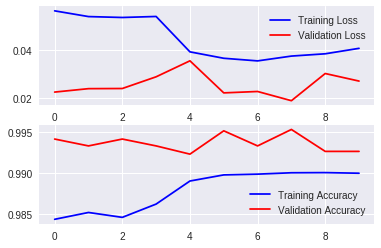

In [109]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(hist.history['loss'], color='b', label="Training Loss")
ax[0].plot(hist.history['val_loss'], color='r', label="Validation Loss", axes=ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['acc'], color='b', label="Training Accuracy")
ax[1].plot(hist.history['val_acc'], color='r', label="Validation Accuracy", axes=ax[1])
legend = ax[1].legend(loc='best', shadow=True)

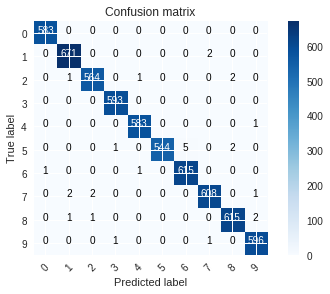

In [115]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  
  thres = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment='center',
             color="white" if cm[i, j] > thres else 'black')
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  
Y_pred = cnn_model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(y_val, axis=1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes=range(10))

### Display some error results

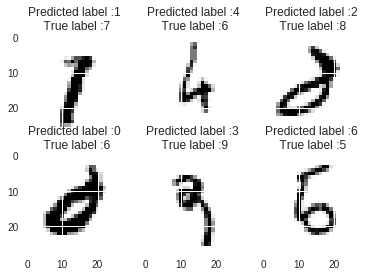

In [118]:
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index, img_errors, pred_errors, obs_errors):
  n = 0
  nrows = 2
  ncols = 3
  fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True)
  for row in range(nrows):
    for col in range(ncols):
      error = errors_index[n]
      ax[row, col].imshow((img_errors[error]).reshape((28, 28)))
      ax[row, col].set_title("Predicted label :{}\n True label :{}".format(pred_errors[error], obs_errors[error]))
      n += 1

Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)
most_important_errors = sorted_dela_errors[-6:]
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

